### Creating classes
Create classes and complete the blanks with proper implementation of 'grad' and 'value' functions

In [526]:
from collections import defaultdict
from math import sqrt
import numpy as np
from scipy.stats import norm
from tqdm import tqdm

In [286]:
class Derivative:
    """ Enabling the usage of +, *, -, etc. """
    def __add__(self, other):
        return Add(self, other)
    
    def __radd__(self, other):
        return rAdd(self, other)
    
    def __sub__(self, other):
        return Sub(self, other)

    def __rsub__(self, other):
        return rSub(self, other)
    
    def __mul__(self, other):
        return Mul(self, other)
    
    def __rmul__(self, other):
        return rMul(self, other)
    
    def __truediv__(self, other):
        return Div(self, other)

    def __rtruediv__(self, other):
        return rDiv(self, other)
   
    def Sin(self):
        return Sin(self)
    
    def __pow__(self, power):
        return Pow(self, power)
    
    def Exp(self):
        return Exp(self)
    
    def Cdf(self):
        return Cdf(self)
    
    def __ge__(self, other):
        return Ge(self, other)
    
    def __le__(self, other):
        return Le(self, other)
    
    def __hash__(self):                 # we need this for creating the dictionary with keys as Derivatives object
        return hash(str(self))

Leaf nodes

In [287]:
class Var(Derivative):
    """ A leaf node (a node which doesn't have any child) """
    
    def __init__(self, value):
        self.value = value      # the scalar value of the node

In [288]:
class Ge(Derivative):
    """ >= """
            
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a >= node_b.value
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value >= node_b
        else:      
            self.value = node_a.value >= node_b.value

In [289]:
class Le(Derivative):
    """ <= """

    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a <= node_b.value
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value <= node_b
        else:      
            self.value = node_a.value <= node_b.value

Adding the nodes

In [290]:
class Add(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

In [291]:
class rAdd(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

Substract the nodes

In [292]:
class Sub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]     # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

In [293]:
class rSub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]     # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

Multiplication of nodes

In [403]:
class Mul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float, np.ndarray)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float, np.ndarray)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]        # f = x*y   df / dx = y   df / dy = x

In [404]:
class rMul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float, np.ndarray)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float, np.ndarray)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]                                # f = x*y   df / dx = y   df / dy = x

Dividing nodes

In [405]:
class Div(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

In [406]:
class rDiv(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

Logarithm of one mode

In [407]:
class Log(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.log(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.log(node.value)                          
            self.grad = [(node, 1/node.value)]                 

Sinus of one node

In [408]:
class Sin(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.sin(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.sin(node.value)                          # use np.sin() function
            self.grad = [(node, np.cos(node.value))]                 # only one derivative, since it takes only one node - use np.cos() function

Cosinus of one node

In [409]:
class Cos(Derivative):
    """ The node that results from cos(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.cos(node)
            self.grad = [(node, 0)]
        else:
            self.value = np.cos(node.value)                          
            self.grad = [(node, -np.sin(node.value))]                

Powers

In [410]:
class Pow(Derivative):
    """ The node that results as node ^ power """
    
    def __init__(self, node, power):
        if isinstance(node, (int, float)): 
            self.value = node**power  
            self.grad = [(node, 0)]
        else:
            self.value = node.value**power                                         # reminder of power operation in python: **
            self.grad = [(node, power*node.value**(power-1))]                      # (one derivative)    f = x^n   df/dx = n * x ^ (n-1)

Exponential

In [411]:
class Exp(Derivative):
    """ The node that results from exp(node) """

    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.exp(node)  
            self.grad = [(node, 0)]
        else:
            self.value = np.exp(node.value)                         
            self.grad = [(node, np.exp(node.value))]   

In [420]:
class ExpK(Derivative):
    """ The node that results from exp(k*node) """
    
    def __init__(self, node, k):
        if isinstance(node, (int, float)): 
            self.value = np.exp(k * node)  
            self.grad = [(node, 0)]
        else:
            self.value = np.exp(k*node.value)                          
            self.grad = [(node, k*np.exp(k*node.value))]                

Squareroot

In [443]:
class Sqrt(Derivative):
    """ The node that results from sqrt(node) """
 
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.sqrt(node)
            self.grad = [(node, 0)]
        else:
            self.value = np.sqrt(node.value)                  
            self.grad = [(node, 1/(2*np.sqrt(node.value)))]  

$ a^x $

In [414]:
class Pot(Derivative):
    """ The node that results from a ^ node """   
    def __init__(self, a, node):
        self.value = a**node.value                          
        self.grad = [(node, a**node.value * np.log(a))]                

Cdf

In [415]:
class Cdf(Derivative):
    """ The node that results from cdf(node) """

    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = norm.cdf(node) 
            self.grad = [(node, 0)]
        else:
            self.value = norm.cdf(node.value)            
            self.grad = [(node, norm.pdf(node.value))]

### Create a function for getting the gradients values
The algorithm will return a dictionary 'gradients' which will have the nodes as keys and partial derivatives in respect to that nodes as values
so the structure will be e.g.:

gradients = {x1: 1, w1: 14}

We will go through the variable 'stack'. Stack will be a list of tuples (node, deriative).

Let's assume we have such a graph:

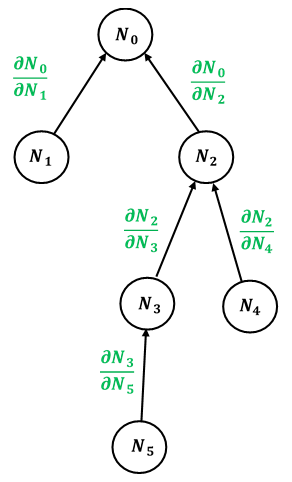

1. First, stack will be assigned with child nodes of the parent node

        stack = N0.grad

        stack = [ (N1,  dN0 / dN1),  (N2,  dN0 / dN2) ]
        

2. We will take the last element from the stack 

        stack = [ (N1,  dN0 / dN1) ]
        
        
    and save it in variables 'node' and 'node_derivative'

        node = N2

        node_derivative = dN0 / dN2
        
    
    then add the node_derivative to the gradients[node]

        gradients[node] = gradients[node] + node_derivative
        
        gradients[N2] = dN0 / dN2
        

3. If 'node' has children nodes, iterate through them AND append them onto a stack with their derivative multiplied by 'node_derivative'

    * child_node = N3,    child_node_derivative = dN2 / dN3

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]
            
            
    * child_node = N4,    child_node_derivative = dN2 / dN4

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2), (N4, dN2 / dN4 * dN0 / dN2) ]
            
            
4. Take again last element from the stack and save in 'node' and 'node_derivative' and add 'node_derivative' to gradients[node]

        stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]

        node = N4

        node_derivative = dN2 / dN4 * dN0 / dN2

        gradients[N4] = dN2 / dN4 * dN0 / dN2
            

5. N4 has no children, so do nothing

6. Take again last element from the stack - repeat step 4 (fill in the blanks - you'll get better understanding):

        stack = [ (N1,  dN0 / dN1) ]

        node = N3

        node_derivative = dN2 / dN3 * dN0 / dN2

        gradients[N3] = dN2 / dN3 * dN0 / dN2
            

7. Iterate through children of node N3 - repeat step 3:

        * child_node = N5,    child_node_derivative = dN3 / dN5

            stack = [ (N1,  dN0 / dN1), (N5, dN3 / dN5 * dN2 / dN3 * dN0 / dN2) ]
            

8. What will be the next step?

        stack = [ (N1,  dN0 / dN1) ]

        node = N5

        node_derivative = dN3 / dN5 * dN2 / dN3 * dN0 / dN2

        gradients[N5] = dN3 / dN5 * dN2 / dN3 * dN0 / dN2
        
        
9. Does N5 have children? 

        * No

10. What is the next step?

        stack = []

        node = N1

        node_derivative = dN0 / dN1

        gradients[N1] = dN0 / dN1
        
        
11. What is the next step? When do we end?

In [362]:
def Get_Gradient(parent_node):
    """ Go down the graph, and compute derivative of `parent_node` with respect to each node """
    
    # we will create a dictionary 'gradient' which will have the nodes as keys and its derivatives as values
    gradients = defaultdict(lambda: 0)    # initialize the dictionary so when calling a non-existing key the value of 0 is assigned
    
    # stack will represent the list of tuples (node, node_derivative) 
    stack = parent_node.grad.copy()     
    
    while stack:                             # loop for each different branch
        # get node and node_derivative from the top of the stack - function pop()
        temp = stack.pop()                   
        node = temp[0]
        node_derivative = temp[1]            
        # add to the value of derivative of the node (gradients[node]) value node_derivative
        gradients[node] = gradients[node] + node_derivative  
        
        if not isinstance(node, Var):        # if the node has children, put them onto the stack
            # loop for each node in one branch
            for child_node, child_node_derivative in node.grad:                   
                # append child_node and child_node_derivative * node_derivative to the stack
                stack.append((child_node, child_node_derivative * node_derivative))
                
    return dict(gradients)

In [363]:
# ## Printtest

# def Get_Gradient_Print(parent_node):
#     """ Go down the graph, and compute derivative of `parent_node` with respect to each node """
    
#     # we will create a dictionary 'gradient' which will have the nodes as keys and its derivatives as values
#     gradients = defaultdict(lambda: 0)    # initialize the dictionary so when calling a non-existing key the value of 0 is assigned
    
#     # stack will represent the list of tuples (node, node_derivative) 
#     stack = parent_node.grad.copy()     
#     print("Parent: ", parent_node,", Grad: ", parent_node.grad)
    
#     while stack:                             # loop for each different branch
#         # get node and node_derivative from the top of the stack - function pop()
#         temp = stack.pop()                   
#         node = temp[0]
#         node_derivative = temp[1]  
#         print("Type: ", node,", Grad: ", node_derivative)
#         # add to the value of derivative of the node (gradients[node]) value node_derivative
#         gradients[node] = gradients[node] + node_derivative  
        
#         if not isinstance(node, Var):        # if the node has children, put them onto the stack
#             # loop for each node in one branch
#             for child_node, child_node_derivative in node.grad:                   
#                 # append child_node and child_node_derivative * node_derivative to the stack
#                 stack.append((child_node, child_node_derivative * node_derivative))
#                 print("Child-type: ", child_node,", Grad: ", child_node_derivative)
                
#     return dict(gradients)

### Test the function
#### 1. Example

$$ f(x_1, x_2, x_3) = \sin(x_2 + {x_1}^2) \frac{x_3 - x_1}{x_2} $$

$$ \frac{\partial f}{\partial x_1} = \sin(x_2 + {x_1}^2) (- \frac{1}{x_2}) + \frac{x_3-x_1}{x_2} \cos(x_2 + {x_1}^2) 2x_1 $$

In [364]:
def f(x1, x2, x3):
    if type(x1) == int:                                           # check if type of arguments (any argument) is int - then return the equation with np.sin, otherwise Sin
        return np.sin(x2 + x1**2) * ((x3 - x1) / x2)
    return Sin(x2 + x1**2) * ((x3 - x1) / x2)

def part_f_x1(x1, x2, x3):
    return np.sin(x2 + x1**2) * (-1 / x2) + ((x3 - x1)/x2 * np.cos(x2 + x1**2) * 2 * x1)

def part_f_x2(x1, x2, x3):
    return (1/x2)*(x3-x1)*np.cos(x2+x1**2)-(1/x2**2)*(x3-x1)*np.sin(x2+x1**2)

def part_f_x3(x1, x2, x3):
    return (1/x2)*np.sin(x2+x1**2)

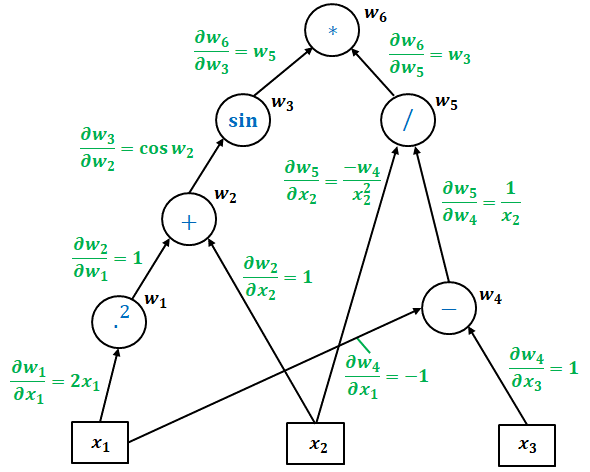

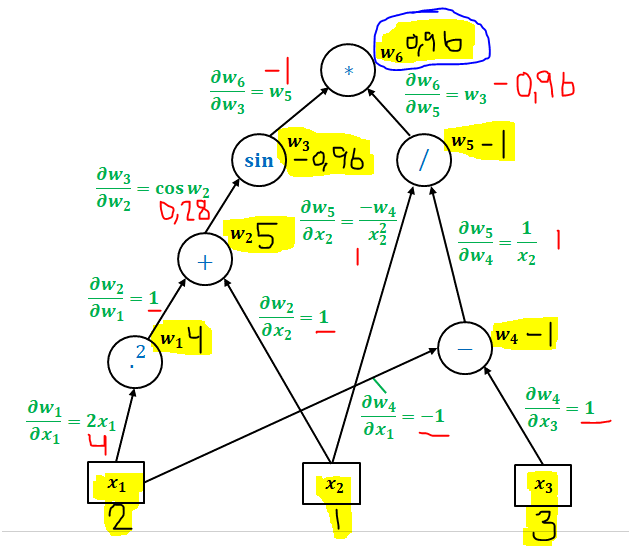

In [365]:
# assign the values
x1_val = 2
x2_val = 1
x3_val = 3

In [366]:
x1 = Var(x1_val)
x2 = Var(x2_val)
x3 = Var(x3_val)

y = f(x1, x2, x3)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to x1 =', gradients[x1])
print('The partial derivative of y with respect to x2 =', gradients[x2])
print('The partial derivative of y with respect to x3 =', gradients[x3])

Value of f equals -0.9589242746631385
The partial derivative of y with respect to x1 = 2.0935730165160438
The partial derivative of y with respect to x2 = 1.2425864601263648
The partial derivative of y with respect to x3 = -0.9589242746631385


In [367]:
print('[Manual way] Value of f equals', f(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x1 equals', part_f_x1(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x2 equals', part_f_x2(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x3 equals', part_f_x3(x1_val, x2_val, x3_val))

[Manual way] Value of f equals -0.9589242746631385
[Manual way] Value of partial derivative of f with respect to x1 equals 2.0935730165160438
[Manual way] Value of partial derivative of f with respect to x2 equals 1.2425864601263648
[Manual way] Value of partial derivative of f with respect to x3 equals -0.9589242746631385


## Test: Black-Scholes

In [368]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
from scipy.stats import norm
import scipy

In [436]:
def euro_call(S0, K, T, r, sigma):
    d1 = (Log(S0/K)+(r+1/2*(sigma**2))*T)/(sigma*Sqrt(T))
    d2 = d1 - sigma*Sqrt(T)
    return S0 * Cdf(d1)  - K * Exp((-1)*r * T) * Cdf(d2)

In [495]:
S0_val = 100
K_val = 100
T_val = 1
r_val = 0.07
sigma_val = 0.2
n_simulations = 1000
n_steps = 252

In [496]:
S0 = Var(S0_val)
K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
sigma = Var(sigma_val)

y = euro_call(S0, K, T, r, sigma)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', gradients[S0])
print('The partial derivative of y with respect to K =', gradients[K])
print('The partial derivative of y with respect to T =', gradients[T])
print('The partial derivative of y with respect to r =', gradients[r])
print('The partial derivative of y with respect to sigma =', gradients[sigma])

Value of f equals 11.541470170672412
The partial derivative of y with respect to S0 = 0.6736447797120796
The partial derivative of y with respect to K = -0.5582300780053555
The partial derivative of y with respect to T = 7.512880170653974
The partial derivative of y with respect to r = 55.82300780053558
The partial derivative of y with respect to sigma = 36.05269624616482


In [527]:
K_val = 100
T_val = 1
r_val = 0.07
n_simulations = 1000
n_steps = 252
S0_val = 100
sigma_val = 0.2

K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
S0 = Var(S0_val)
sigma = Var(sigma_val)

In [528]:
#S0 = 100
#K = 90
#mu = 0.09
#sigma = 0.5
#n_simulations = 1000
timeline = np.array([1])
dt = np.diff(timeline,prepend =0)
Z = np.random.normal (0 , 1 , size = (n_simulations , len(timeline)))
len(Z[0,:])
#d1 = mu - (sigma **2) / 2
#d2 = d1 * dt + sigma * np.sqrt (dt) * Z

#S = np.hstack ([S0 * np.ones(( n_simulations , 1) ) , np.exp ( d2 ) ]).cumprod ( axis = 1)

1

In [529]:
def Price_European_Option(S0, K, T, r, sigma, Z):
    d1 = r - (sigma**2) / 2
    d2 = d1 * T + sigma * Sqrt(T) * Z 
    S0 = S0 * Exp(d2)
    if ((S0 - K).value >=0) == True:
        
        return (S0 - K) * Exp( -(1)* r * T )
    else:
        
        return (S0 - K) * 0 * Exp( -(1)* r * T )


In [530]:
gs = []
gk = []
gt = []
gr = []
gsigma=[]
for i in tqdm(Z[:,0]):
    y = Price_European_Option(S0, K, T, r,sigma, i)
    gradients = Get_Gradient(y)
    gs.append(gradients[S0])
    gk.append(gradients[K])
    gt.append(gradients[T]) 
    gr.append(gradients[r])
    gsigma.append(gradients[sigma])

#print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', (0.6736537927736208-np.mean(gs)))
print('The partial derivative of y with respect to K =', (-0.5582210648285013-np.mean(gk)))
print('The partial derivative of y with respect to T =', (7.511817785889718-np.mean(gt)))
print('The partial derivative of y with respect to r =', (55.88513957093966-np.mean(gr)))
print('The partial derivative of y with respect to sigma =', (36.06278151150377 - np.mean(gsigma)))






  0%|          | 0/1000 [00:00<?, ?it/s]




100%|██████████| 1000/1000 [00:00<00:00, 7239.35it/s][A

The partial derivative of y with respect to S0 = 0.020041177518113518
The partial derivative of y with respect to K = -0.016500255463145264
The partial derivative of y with respect to T = 0.25160270026442966
The partial derivative of y with respect to r = 1.7130586344040708
The partial derivative of y with respect to sigma = 1.3810873108258122


### Asiatisk AAD Test

In [531]:
K_val = 100
T_val = 1
r_val = 0.07
n_simulations = 2000
n_steps = 252
S0_val = 100
sigma_val = 0.2

K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
S0 = Var(S0_val)
sigma = Var(sigma_val)

In [532]:
timeline = np.arange(0, 1, 1/252)      
Z = np.random.normal (0 , 1 , size = (n_simulations , len(timeline)))

In [533]:
def Price_Asian_Option(S0, K, T, r, sigma, Z,j):
    dt = T/n_steps
    d1 = r - (sigma**2) / 2
    F = S0
    temp = 0
    p = 0
    temp1= 0
    
    for i in range(0,n_steps):
        p += F
        d2 = d1 * dt + sigma * Sqrt(dt) * Z[j,i]
        temp = F * Exp(d2)
        F = temp
    S0 = p / n_steps
   
    if ((S0 - K).value >=0) == True: 

        return (S0 - K) * Exp( -(1)* r * T )
    else:

        return (S0 - K) * 0 * Exp( -(1)* r * T )
   

In [ ]:
gs = []
gk = []
gt = []
gr = []
gsigma=[]
v=[]

for j in tqdm(range(0,n_simulations)):
    S0_val = 100
    S0 = Var(S0_val)
    y = Price_Asian_Option(S0, K, T, r, sigma, Z, j)
    v.append(y.value)
    gradients = Get_Gradient(y)
    gs.append(gradients[S0])
    gk.append(gradients[K])
    gt.append(gradients[T]) 
    gr.append(gradients[r])
    gsigma.append(gradients[sigma])

print('Value of f equals', np.mean(v))
print('The partial derivative of y with respect to S0 =', np.mean(gs))
print('The partial derivative of y with respect to K =', np.mean(gk))
print('The partial derivative of y with respect to T =', np.mean(gt))
print('The partial derivative of y with respect to r =', np.mean(gr))
print('The partial derivative of y with respect to sigma =', np.mean(gsigma))

In [481]:
def BS_Price_Asian_Options(S0, K, T, r, sigma): 
    sigma_G = sigma / Sqrt(3)
    b = (0.5) * (r - (0.5)*(sigma_G**2))
    d1 = (Log(S0 / K) + (b + 0.5 * (sigma_G**2) ) * T)/ (sigma_G * Sqrt(T))
    d2 = d1 - sigma_G*Sqrt(T)

    asian_call = S0 * Exp( (b - r) * T) * Cdf(d1) - K * Exp (-(1) * r * T) * Cdf(d2)
    
    return asian_call

$C_G = S_0 e^{(b-r)T} \Phi(d_1) - K e^{-rT}\Phi(d_2)$

$\sigma_G = \frac{\sigma}{\sqrt{3}}$

$b = \frac{1}{2}(r-\frac{1}{2} \sigma_G^2)$

$d_1 = \frac{log(\frac{S_0}{K})+(b+\frac{1}{2}\sigma_G^2)T}{\sigma_G\sqrt{T}}$

$d_2 = d_1 - \sigma_G \sqrt{T}$

In [465]:
def BS_Price_Asian_Options(S0, K, T, r, sigma):
    
    b = (1/2) * (r - (1/2) * ((sigma / 1.7320508075688772)**2))
    
    d1 = (Log(S0 / K) + (b + (1/2) * ((sigma / 1.7320508075688772)**2) ) * T)/ ((sigma / 1.7320508075688772) * Sqrt(T))
    
    d2 = d1 - (sigma / 1.7320508075688772)*Sqrt(T)
    
    return S0 * Exp((b - r) * T) * Cdf(d1) - K * Exp(-(1) * r * T) * Cdf(d2)

In [466]:
S0_val = 100
K_val = 100
T_val = 1
r_val = 0.07
sigma_val = 0.2

In [467]:
S0 = Var(S0_val)
K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
sigma = Var(sigma_val)

y = BS_Price_Asian_Options(S0, K, T, r, sigma)

gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', gradients[S0])
print('The partial derivative of y with respect to K =', gradients[K])
print('The partial derivative of y with respect to T =', gradients[T])
print('The partial derivative of y with respect to r =', gradients[r])
print('The partial derivative of y with respect to sigma =', gradients[sigma])

Value of f equals 6.024544283554853
The partial derivative of y with respect to S0 = 0.6063517314661314
The partial derivative of y with respect to K = -0.546106288630583
The partial derivative of y with respect to T = 3.596224538143864
The partial derivative of y with respect to r = 24.29304228975174
The partial derivative of y with respect to sigma = 18.95711577861243
